<a href="https://colab.research.google.com/github/mamekin05108/signatecup2024summer/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# チュートリアル

SIGNATE Cup 2024へようこそ!

このチュートリアルでは旅行会社の保有する顧客データ（属性や志向、営業担当との接触履歴等）を元に、旅行パッケージの成約率の予測を行います。

このチュートリアルでは、予測アルゴリズムの作成を[Google Colaboratory](https://colab.research.google.com/)上で実装し、提出ファイルを作成するところまでを説明します。

Google Colaboratoryは、ブラウザ上でpythonによるプログラミングができる無料のサービスで、利用にはgoogleアカウントが必要です。

このチュートリアルで行う分析の大まかな流れは次の通りです:

1. ライブラリの読み込み
2. データの読み込みと確認
3. データの可視化
4. データの前処理
5. データの分割
6. モデルの学習・検証
7. 予測・提出ファイルの作成
8. 今後の方針(ChatGPTの活用例など)


チュートリアル終了後も、このコードをベースに精度を改善してみてください。

たくさんの投稿を心よりお待ちしております!

# 0. colabへのマウント
まずダウンロードしたデータをGoogle Colaboratoryで読み込んで分析を行うためには、Google Driveにファイルをアップロードしてマウントするか、直接Colabにアップロードする方法があります。

このチュートリアルでは、**ドライブにアップロードしたファイルを読み込む**ために、まずGoogle DriveをGoogle Colaboratoryにマウントします。

Google Driveをマウントすることで、ColabノートブックがDrive内のデータに直接アクセスできるようになり、データの読み込みや保存が容易になります。

以下のコードを実行して、ドライブをマウントしてください。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


これでdriveにファイルをマウントすることができました。

データファイルがドライブ上にアップロードされていると、マウントしたドライブからデータを読み込むことができます。

以下のコードでドライブの中身を確認することもできます!



```
!ls /content/drive/MyDrive
```



# 1. ライブラリの読み込み
まずpythonでデータ分析を行うには、データ分析に特化したライブラリが必要です。

ライブラリとは、pythonで特定の目的や領域に特化した機能を提供するものです。

pythonのライブラリを使用すると、短いコードや1行のコードで多くの処理を実装することができます。

データ分析を行うライブラリとして、有名なものが
- pandas(テーブルデータの処理に特化したライブラリ)
- numpy(数値計算に特化したライブラリ)
- matplotlib, seaborn(データの可視化ができるライブラリ)

の3つがあります。

このライブラリを使用するには「import」というコマンドが必要です。

早速やってみましょう!

In [2]:
# ライブラリのimportを行います
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ここで登場する `as` は、pandasのライブラリを `pd` と省略して呼び出すためのものです。このように、ライブラリを短縮名で呼び出すことで、コードがより簡潔になります。

ライブラリのインポートはpythonでデータ分析を行う際の基本知識ですので、しっかり覚えておきましょう。

# 2. データの読み込みと確認
それではデータを読み込んでみましょう!

データを読み込むには`pd.read_csv()`を使います。

このチュートリアルでは、以下のディレクトリ構造を想定しています。
```bash
SIGNATE_Cup 2024
├─data
│  ├─train.csv
│  └─test.csv
│  └─submit_sample.csv
└─チュートリアル.ipynb
```
次に、実際にデータを読み込んで確認してみましょう。

In [3]:
# 自分のドライブにマウントしているとドライブ上のファイルを読み込むことができます。
# ファイルの場所がわからない場合、左のタブから目的のファイルを探し、「パスをコピー」しペーストすることで読み込めます。
train = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/test.csv")

読み込めましたね。
次にデータの中身を簡単にみてみましょう。

In [4]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50歳,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56歳,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,三十七歳,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48歳,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [5]:
test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info
0,3489,４８歳,Self Enquiry,2,13分,Small Business,Male,1.0,4.0,Super De|uxe,3.0,7,0,3,AVP,496950.0,結婚済み 車所持 子供なし
1,3490,30代,Self Enquiry,2,12分,Small Business,Ｆｅｍａｌｅ,1.0,4.0,Standard,3.0,4,1,3,Senior Manager,月収30.0万円,結婚済み、車未所持、子供なし
2,3491,25歳,Self Enquiry,1,540秒,Salaried,Female,1.0,4.0,Basic,3.0,1,0,3,Executive,月収26.0万円,離婚済み、自動車未所有、子供なし
3,3492,21歳,Company Invited,2,420秒,Salaried,Male,1.0,4.0,Basic,4.0,1,0,3,Senior Manager,259875.0,離婚済み、自動車所有、子供なし
4,3493,41歳,Company Invited,1,7分,Salaried,MALE,1.0,4.0,Basic,3.0,1,0,4,Executive,268830.0,独身/車所持／子供なし


データの一部が見えました。

このデータには、

- id: 営業リストの顧客ID
- Age: 顧客の年齢
- TypeofContact: 顧客への連絡方法
- CityTier: 都市層(1>2>3)
- DurationOfPitch: 営業担当者による顧客への売り込み時間
- Occupation: 顧客のご職業
- Gender: 顧客の性別
- NumberOfPersonVisiting: 一緒に旅行を予定している人数の合計
- NumberOfFollowups: セールストーク後に営業担当者が行ったフォローアップの合計数
- ProductPitched: 営業担当者による商品の売り込み
- PreferredPropertyStar: 顧客によるホテル施設の優先評価
- NumberOfTrips: 顧客の年間旅行数
- Passport: パスポートの所持
- PitchSatisfactionScore: 売り込みの満足度スコア
- Designation: 現在の組織における顧客の指定
- MonthlyIncome: 顧客の月収
- customer_info: 顧客の情報のメモ(婚姻状況や車の有無、旅行の子どもの同伴の有無について記載されている)
- ProdTaken: 目的変数

の存在が確認できました。

本コンペではtestデータのProdTakenをできるだけ正確に予測する必要があります。このため予測対象であるtestデータにはProdTakenがありません。

次にデータの形状をみてみましょう。

形状を確認することでデータがいくつ存在するのか、特徴量が何個あるかがわかります。

In [6]:
print(train.shape)
print(test.shape)

(3489, 18)
(3489, 17)


訓練データは3489行・18列のデータがあります。

一方でテストデータは3489行・17列のデータがあることが確認できました。

テストデータが1列少ないのはテストデータには、ProdTakenの項目がないからです。

# 3. データの可視化
次にデータの可視化を行います。

データを可視化することで、どの特徴量が予測に重要かを理解できます。

このチュートリアルでは、以下の特徴量の可視化を行います:
- **ProdTaken**（予測対象）
- **PreferredPropertyStar**（顧客によるホテル施設の優先評価）
- **Occupation**（お客様のご職業）

それではまず予測対象であるProdtakenの中身の確認をしましょう。

成約数と不成約数がそれぞれ何個あるのかを比較します。

これにより、予測対象であるProdTakenの出現数を確認することができます。

In [7]:
# value_countsで出現数を確認することができます。
train["ProdTaken"].value_counts()

,count
ProdTaken,
0,2992
1,497


0(不成約)が2992個、1(成約)が497存在しました。

1が0と比べて少ないことがわかります。

次に、どれくらい比率が違うのかを棒グラフで確認してみましょう。

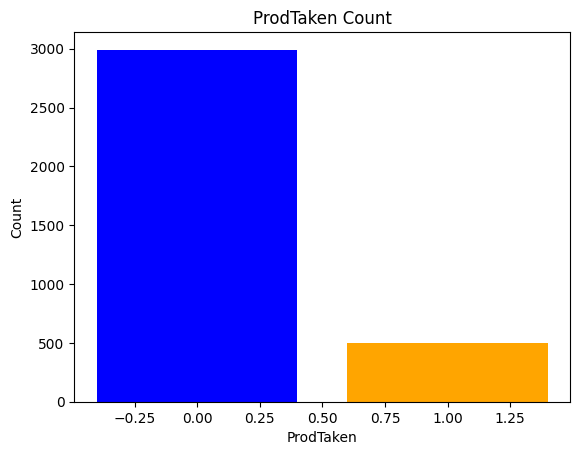

In [8]:
ProdTaken_value_counts = train["ProdTaken"].value_counts()
# ProdTaken_value_counts.indexはグラフのx軸の部分を表し、0と1を表します。ProdTaken_value_counts.valuesはx軸に対応した出現数を表し、0は2992個、1は497個存在します。
plt.bar(ProdTaken_value_counts.index, ProdTaken_value_counts.values, color=['blue', 'orange'])
plt.xlabel('ProdTaken')
plt.ylabel('Count')
plt.title('ProdTaken Count')
plt.show()

可視化すると、ラベルが1のデータの方が少ないことが直感的に理解できます。

このデータのように、予測対象となるデータのラベル数が均等でないデータもよく見かけます。このようなデータを不均衡データと呼び、学習・予測する際にこの不均衡を考慮する必要があります。このチュートリアルでは不均衡データに対する具体的な対処は行いませんが、興味があれば不均衡データについても調査してみてください。

次に、PreferredPropertyStar（顧客によるホテル施設の優先評価）を可視化し、ProdTakenとの関係性を見てみましょう。

評価が高いほど契約する可能性が高いと仮定できます。

評価と契約の関係性を見るには様々な方法がありますが、まずはシンプルに**成約した人と不成約の人で評価の大きさに違いがあるのか**を平均値で確認してみましょう。

集約するには`groupby`を使用します。

具体的には、
`データフレームの変数.groupby("集約したい特徴量")["集約される特徴量"].計算式`で集約できます。<br>
なお、
- 「データフレームの変数」は操作を行うデータフレームです。
- 「集約したい特徴量」はデータをグループ化する基準となる列名(特徴量名)です。
- 「集約される特徴量」は集計を行う対象の列名(特徴量名)です。
- 「計算式」 は使用する集計関数です（例: 平均はmean(), 合計はsum(), 最大値はmax()）。

となっています。

In [9]:
# 以下のコードで集約できます。
train.groupby("ProdTaken")["PreferredPropertyStar"].mean()

,PreferredPropertyStar
ProdTaken,
0,3.442513
1,3.432596


今回の可視化では、成約した人と不成約の人で評価に大きな差がないように見えました。

念のため、平均値のグラフを可視化してみましょう。

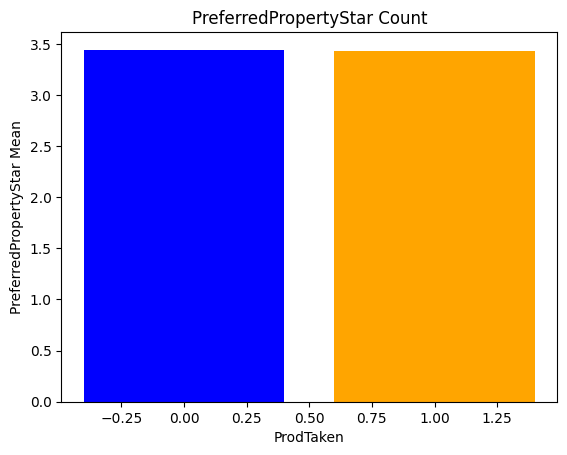

In [10]:
groupby_PreferredPropertyStar = train.groupby("ProdTaken")["PreferredPropertyStar"].mean()
plt.bar(groupby_PreferredPropertyStar.index, groupby_PreferredPropertyStar.values, color=['blue', 'orange'])
plt.xlabel('ProdTaken')
plt.ylabel('PreferredPropertyStar Mean')
plt.title('PreferredPropertyStar Count')
plt.show()

可視化すると、成約した人と不成約の人で評価に大きな差がないことがわかりました。

PreferredPropertyStarとProdTakenには関係性が見られないようです。

最後に、Occupation（お客様のご職業）と成約の関係性を可視化してみましょう。

平均と出現数を同時に確認するには、`agg(["mean", "count"])`を使用します。これにより、平均と出現数の両方を同時に集計できます。

また、`sort_values(by="count", ascending=False)`で出現数（count）を基準に降順に並び替えます。


In [11]:
# 平均と出現数を同時に確認するには、agg(["mean", "count"])を使用します。これにより、平均と出現数の両方を同時に集計できます。
# また、sort_values(by="count", ascending=False)は出現数（count）を基準に降順に並び替えます。
train.groupby("Occupation")["ProdTaken"].agg(["mean", "count"]).sort_values(by="count", ascending=False)

,mean,count
Occupation,,
Small Business,0.157499,1727
Salaried,0.102070,1401
Large Business,0.227147,361


Large Businessの顧客が成約率が高いことがわかりました。

これも棒グラフで可視化してみましょう。

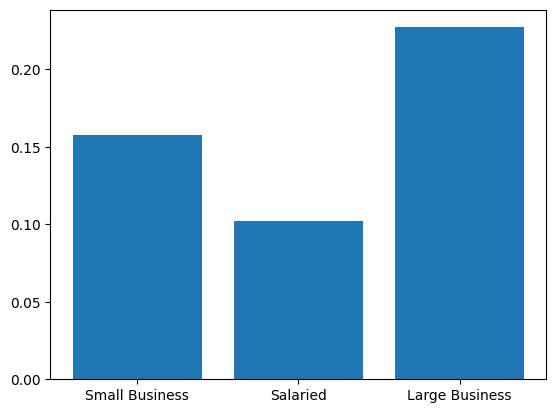

In [12]:
grouped = train.groupby("Occupation")["ProdTaken"].agg(["mean", "count"]).sort_values(by="count", ascending=False)
plt.bar(grouped.index, grouped["mean"])
plt.show()

上記のコードにより、Large Businessの顧客が他の職業に比べて成約率が高いことを視覚的に確認できます。

このチュートリアルではここまでですが、他にもTypeofContact（顧客への連絡方法）、Gender（性別）、Designation（現在の組織における顧客の役職）なども同様に棒グラフで確認できます。先ほどのコードを参考にし、対象の特徴量を変更して実行してください。

ですがGenderなどの一部カテゴリデータは分析する際に、表記揺れなどの注意が必要なポイントがあります。これは最後に解説しますので、最後までぜひご確認ください。

# 4. 前処理
まずは、可視化した特徴量を用いて機械学習モデルを作成してみましょう。

その前に、機械学習モデルに学習させるためのデータ前処理が必要です。

まず、前処理が必要なのはTypeofContactやOccupationです。
これらの特徴量は数値ではなく、文字で情報が表現されています。

このような数値ではなく文字で表現されている特徴量のことを カテゴリ変数 といいます。

カテゴリ変数は機械学習ではそのままでは扱えないため、**一度数値に変換する**必要があります。


カテゴリ変数を数値に変更する方法は一般的に2つあります：
- ラベルエンコーディング
- ダミー変数

本チュートリアルではダミー変数を用いて変換を行います。

ダミー変数とは、カテゴリデータ内の特定の要素が出現したかを0と1で表す方法です。

それではやってみましょう。

In [13]:
# pd.get_dummiesを使って、カテゴリ変数をダミー変数に変換します。
# columns パラメータでダミー変数化する特徴量を指定します。
train = pd.get_dummies(train, columns=["TypeofContact", "Occupation"])
test = pd.get_dummies(test, columns=["TypeofContact", "Occupation"])

In [ ]:
train.head()

,id,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,...,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,0,50歳,2,900秒,male,1.0,4.0,Basic,3.0,5,...,4,Executive,253905.0,未婚 車未所持 子供なし,1,False,True,True,False,False
1,1,56歳,1,14分,Male,1.0,4.0,Standard,3.0,2,...,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0,True,False,False,True,False
2,2,NaN,1,10分,Female,1.0,3.0,Basic,3.0,4,...,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1,False,True,True,False,False
3,3,三十七歳,2,1080秒,female,1.0,3.0,Standard,4.0,1,...,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0,False,True,False,False,True
4,4,48歳,3,1020秒,female,1.0,3.0,Basic,4.0,4,...,4,Executive,258435.0,独身／車所持／無子,1,True,False,False,False,True


In [14]:
#TypeofContact_Company Invited列の内容を確認します。
train["TypeofContact_Company Invited"].head()

,TypeofContact_Company Invited
0,False
1,True
2,False
3,False
4,True


この方法でカテゴリデータと数値にした特徴量が作成されました。

先ほども説明したように、ダミー変数はカテゴリデータが出現したかどうかを0と1で表す方法です。

このチュートリアルではTrueとFalseで表記されていますが、Trueは1、Falseは0という意味になり、数値として扱われます。

例えば、5行目の TypeofContact_Company Invited がTrueになっている場合、元のデータを確認すると5行目の TypeofContact が Company Invited であることが確認できます。

他にも Occupation のデータには以下のカテゴリがあります：
- Large Business
- Salaried
- Small Business

これらのカテゴリがダミー変数に変換されると、以下のような特徴量が作成されます：

- Occupation_Large Business
- Occupation_Salaried
- Occupation_Small Business

ダミー変数はカテゴリ変数をわかりやすく数値に変換しますが、特徴量の数が多くなるため、データの中身を確認する際に視認性が悪くなる点に注意してください。

In [15]:
# Occupationのダミー変数の一部を確認します。
train[['Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business']].head()

,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,False,True


# 5. データの分割
学習に使う特徴量を数値データに変換できたので、次にデータの分割を行います。

データの分割は、機械学習モデルの性能を測るために重要です。

まず、使用する特徴量を選定します。

チュートリアルでは、以下の特徴量を使用してAIモデルの学習・推論を行います：

- PreferredPropertyStar
- TypeofContact
- Occupation
- CityTier
- NumberOfPersonVisiting
- Passport

それ以外のデータは削除して学習を行います。

特徴量を削除するには、以下のように drop を使用します：

In [16]:
# "ProdTaken"は予測対象とするため、別途target変数に格納する
target = train["ProdTaken"]
# 学習に不要な特徴量を削除します。
# 削除する特徴量は: 'id', 'Age', 'DurationOfPitch', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'NumberOfTrips', 'PitchSatisfactionScore', 'Designation', 'MonthlyIncome', 'customer_info', 'ProdTaken'
train = train.drop(columns=['id', 'Age', 'DurationOfPitch', 'Gender', 'NumberOfFollowups', 'ProductPitched',
                            'NumberOfTrips', 'PitchSatisfactionScore', 'Designation', 'MonthlyIncome', 'customer_info',
                            "ProdTaken"], axis=1)
test = test.drop(columns=['id', 'Age', 'DurationOfPitch', 'Gender', 'NumberOfFollowups', 'ProductPitched',
                          'NumberOfTrips', 'PitchSatisfactionScore', 'Designation', 'MonthlyIncome', 'customer_info'], axis=1)

In [17]:
# データの先頭5行を確認します。
train.head()

,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,2,1.0,3.0,1,False,True,True,False,False
1,1,1.0,3.0,1,True,False,False,True,False
2,1,1.0,3.0,0,False,True,True,False,False
3,2,1.0,4.0,0,False,True,False,False,True
4,3,1.0,4.0,0,True,False,False,False,True


In [18]:
# データの先頭5行を確認します。
test.head()

,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,2,1.0,3.0,0,False,True,False,False,True
1,2,1.0,3.0,1,False,True,False,False,True
2,1,1.0,3.0,0,False,True,False,True,False
3,2,1.0,4.0,0,True,False,False,True,False
4,1,1.0,3.0,0,True,False,False,True,False


データを確認すると、全てのデータが数値となっていることを確認できます。

それでは、データの分割を行います。

データの分割は、モデルの性能を適切に評価するために重要で、実際に運用する機械学習モデルの性能を担保するために必要な作業です。

データ分割の方法にも様々な方法がありますが、本チュートリアルではscikit-learnのtrain_test_splitを利用します。

train_test_splitはデータを学習用と評価用の2つに分割する方法です。

In [19]:
# scikit-learnからtrain_test_splitをインポートします。
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(2616, 9) (873, 9) (2616,) (873,)


データを分割することができました。

train_test_split で出力された X_train, X_valid, y_train, y_valid は、分割後のデータです。

- X はデータの特徴量を表し、

- y は予測対象を表します。

- X_train, y_train はモデルの学習に使用するデータです。

- X_valid, y_valid は学習したモデルの評価用に使用します。

詳しくは次の「学習と検証」のステップで確認しましょう。

# 6. 学習と検証
それでは機械学習モデルの学習を行ってみましょう。

本チュートリアルでは、機械学習アルゴリズムの一つであるランダムフォレストを使って予測を行います。（詳細は省略しますが、ランダムフォレストは決定木のアンサンブル学習法の一種です。）

機械学習アルゴリズムは、scikit-learnライブラリからインポートできます。

また、本コンペティションで使用する評価指標AUC（Area Under the ROC Curve）もscikit-learnからインポートできます。AUCは、モデルの予測能力を評価するための指標で、高いほど良いモデルとされます。

これらをインポートしましょう。

In [21]:
# ランダムフォレストとAUC評価指標をインポートします。
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

それではランダムフォレストを呼び出し、分割した学習用データX_train, y_trainで学習してみましょう。

In [22]:
# ランダムフォレストモデルを呼び出します。ランダムフォレストは実行するたびに学習結果が変わることがあるのでrandom_stateに数字を指定して結果を固定します。
model = RandomForestClassifier(random_state=42)
# model.fit() で学習します。訓練データと訓練データの目的変数を指定します。
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

学習できました。

それでは次に予測をしてみましょう!

分類における予測方法には、予測を0と1の**二値**で判定する`model.predict()`と、**確率**を計算する`model.predict_proba()`の二つがあります。

今回の評価指標である`roc_auc_score`は確率からスコアを計算するため、`model.predict_proba()`を使います。

分割した評価用データX_validを予測してみましょう。

In [23]:
# predict_proba() で予測します。予測したいデータを入力します。
pred = model.predict_proba(X_valid)

In [24]:
# 予測の中身を確認します
print(pred[:5])

[[0.88942315 0.11057685]
 [0.65010806 0.34989194]
 [0.92741608 0.07258392]
 [0.8826726  0.1173274 ]
 [0.94218052 0.05781948]]


これで予測できました!

2列の予測結果が出力されていますが、1列目が0の確率(成約していない確率)、2列目が1の確率(成約している確率)を表します。

それでは最後に検証データ(y_valid)と予測結果(pred)の目的変数と比較してモデルの精度を評価しましょう。

In [25]:
# AUCの評価はroc_auc_score(正解データ, 予測データ)で可能です。
# 成約したかどうかを判定するため、2列目の1の確率(成約している確率)を予測データとして入力します。
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

0.6376585475361993


スコアは約0.637659でした。

このスコアは、モデルが成約の有無を予測する際の性能を示します。

最後にスコアをROCカーブでみてみましょう。

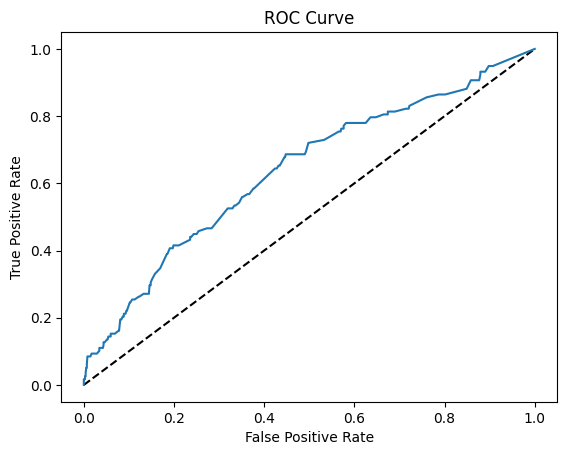

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROCカーブは0.5がランダムの予測となり、今回の予測では約0.637659とランダムより良い予測となっています。

# 7. 提出
それでは最後に、学習したモデルをテストデータに対して予測をし、提出を行います。

まずテストデータを`model.predict_proba()`で予測しましょう。

In [27]:
# テストデータを用いて予測します。
predict = model.predict_proba(test)

次に、提出ファイルを作成します。

提出ファイルの見本は submit_sample.csv にあります。確認してみましょう。

In [28]:
# submit_sample.csvを読み込みます。
submit = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/sample_submit.csv", header=None)
submit.head()

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451


submit_sample.csv の最初の列はid、二番目の列は ProdTaken の予測確率であることが確認できます。

sample_submit.csv の id はテストデータの id と一致しているため、二番目の列をモデルで予測した確率に変更することで提出ファイルを作成できます。

In [29]:
# 提出ファイルの2列目を予測値で置き換えます。
submit[1] = predict[:, 1]

In [30]:
#確認してみましょう
submit.head()

,0,1
0,3489,0.320317
1,3490,0.090497
2,3491,0.000000
3,3492,0.211412
4,3493,0.167033


ProdTakenの部分が予測データに変わっていることが確認できました。

ではこのデータをcsv形式で保存し提出しましょう。

`to_csv()`でデータをcsvに保存することができます。

In [33]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとしてください。)
submit.to_csv("/content/drive/MyDrive/Signate/2024summer/submission.csv", index=False, header=None)

これで本チュートリアルは終了です!

ここまでのチュートリアルお疲れ様でした!

# 今後の方針
提出が完了したからといって、このコンペティションは終わりではありません。次のステップは、精度を改善することです。

では、どのようにして精度を向上させるのでしょうか？以下にいくつかのヒントを示します。

## 予測モデルを変更する

ランダムフォレスト以外にも、勾配ブースティングやロジスティック回帰などが存在します。どのモデルが最適かはデータによって異なるため、様々なモデルを試してみる価値があります。

## 予測モデルのパラメータを調整する

ランダムフォレストには様々なパラメータが存在します。例えば、max_depth(木の深さ)などがあります。これらのパラメータを変更して、予測性能がどう変化するかを確認してみましょう。

参考リンク: [ランダムフォレストのパラメータ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

## 予測に使用する特徴量を増やす

本データセットに存在する以下の特徴量はまだ使われていません。これらを追加してみるとどうなるでしょうか?
- Age
- DurationOfPitch
- Gender
- NumberOfFollowups
- ProductPitched
- NumberOfTrips
- Passport
- PitchSatisfactionScore
- Designation
- MonthlyIncome
- customer_info

## データの前処理

このデータには前処理が必要です。生データをそのまま使用すると、人間が解釈するのと機械学習モデルが解釈するのとで異なる結果が出ることがあります。

例えばAgeの場合、"50歳"のデータが存在しますが、機械学習モデルでは"50歳"というカテゴリデータで解釈されます。年齢は大きければ大きいほど、成約に影響を与えるかもしれませんが、カテゴリデータではその大きさを比較できません。このためAgeをカテゴリデータから数値に直す必要があるかもしれません。

## Genderなどの一部特徴量の違和感の確認

Genderの場合、全角や大文字が混在しています。

例えば、機械学習ではfemaleとFemaleは異なるデータとして扱われますが、これは正しい扱い方でしょうか?この点を確認してみましょう。

### Tips1 ChatGPTの利用

初学者にとってはpythonのコードを理解し、前処理をするのは時間がかかり苦労するものです。

ですが、ChatGPTを使うと、データ分析のヒントや前処理について、コードを含めた前処理についての方法の情報を提供してくれたり、コードの提案をしてくれます。

以下にChatGPT(GPT3.5)を使った本データの前処理の例を掲載します。ぜひこれらを活用してデータ分析を進めて精度を上げてください。

※ChatGPTが出力が常に同じになるとは限らないため、リンクに記載されているコードが、手元でも同じ回答でないらないことがあります。また提案されたコードが完璧な分析・前処理であるとは限りません。<br>
※GPT3.5を使用しているため、データ分析機能を利用しておりません。

- Ageの前処理の例

https://chat.openai.com/share/787e2f8a-9f4b-4e36-b577-2f752e11b2a2

- Genderの前処理の例

https://chatgpt.com/share/ffac983c-036d-4993-9c3a-2a86fcc7ef1b

- DurationOfPitchの前処理の例

https://chat.openai.com/share/4604c7ca-7b84-492f-bd08-9ecaccc1bf2b

また他にもデータを直接アップロードして分析・処理する機能も利用可能です。アップロードしたデータを分析するにはGPT4かGPT4-oを使用する必要があります。

- ChatGPTを用いたデータ分析例

https://chatgpt.com/share/47fe9dea-f4db-46ce-ba4a-a3bffe0c2749

- Designationの例

https://chatgpt.com/share/d8a911cc-bc56-45dc-a455-d7262106089a